## Imports 🙅🏻‍♂️🙅🏻‍♀️

In [185]:
import matplotlib
# !pip install opencv-python
import matplotlib.pyplot as ajeeb
import cv2
import math
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy import linalg
from scipy.linalg import null_space
# !pip install imageio
import imageio

## TASK-02 (45 MARKS)🕷️

### Pre-Processing (2 Marks)
- Justify each step of your pre-processing in comments
- Save the final pre-process images to the same directory

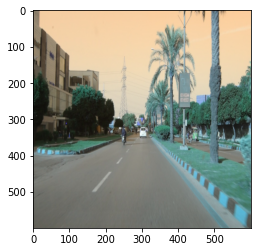

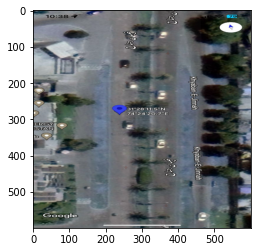

In [186]:
# Add your code here
# Load the two images
def normalize_image(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    normalize_image = cv2.normalize(gray_image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    normalize_image= cv2.resize(image, (600, 600))
    return normalize_image

image1 = cv2.imread('street.jpg')  
image2 = cv2.imread('aerial.jpg')

image1 = normalize_image(image1)
image2 = normalize_image(image2)

# Display the two images
# Add your code here
plt.imshow(image1)
plt.show()

plt.imshow(image2) 
plt.show()


### Reading image points

Load the first image you're about to stitch and mark some points that you find in the second image too. The `point_reader()` function from `StudentID_PA3.py` will be helpful.

### Reading the first image's points (4 Marks)

In [187]:
def point_reader(img):
    img_copy = img.copy()
    cv2.namedWindow("Mark Points")
    marked_points = []

    def click_event(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            marked_points.append((x, y))
            # Draw a circle at the clicked point
            cv2.circle(img_copy, (x, y), 5, (0, 255, 0), -1)
            cv2.imshow("Mark Points", img_copy)

    cv2.setMouseCallback("Mark Points", click_event)
    cv2.imshow("Mark Points", img_copy)
    
    while len(marked_points) < 4:
        cv2.waitKey(1)     
    cv2.destroyAllWindows()

    marked_img_path = "marked_image.jpg"
    cv2.imwrite(marked_img_path, img_copy)


    points_array = np.array(marked_points)
    return points_array

In [188]:
# Save your points in an np.array
img1_points = point_reader(image1)
print(img1_points)

[[273 341]
 [  2 492]
 [445 463]
 [321 340]]


### Reading the first image's points (4 Marks)

In [189]:
# Save your points in an np.array
img2_points = point_reader(image2)
print(img2_points)

[[212 154]
 [171 585]
 [280 581]
 [285 157]]


### Finding Homography (25 Marks)
You are required to calculate the homography matrix H.
$$
\begin{bmatrix}
x'  \\
y'  \\
h 
\end{bmatrix}
=
\begin{bmatrix}
h_1 & h_2 & h_3 \\
h_4 & h_5 & h_6 \\
h_7 & h_8 & h_9
\end{bmatrix}
\times 
\begin{bmatrix}
x  \\
y  \\
1 
\end{bmatrix}
$$
You can use the strategy from WA-1, Q#7 to solve this =)

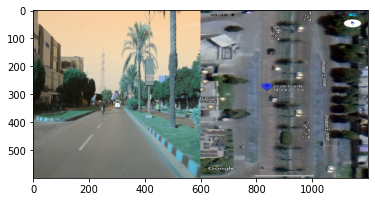

In [190]:
# We are creating the canvas which is essentially the two images joined together
row1, col1 = image1.shape[:2]
row2, col2 = image2.shape[:2]

canvas = np.zeros((max(row1, row2), col1 + col2, 3), dtype='uint8')

# We are placing the first image on the left side of the canvas
canvas[:row1, :col1, :] = image1
# We are placing the second image on the right side of the canvas
canvas[:row2, col1:col1 + col2, :] = image2


# Display the canvas
plt.imshow(canvas)

In [191]:
img2_points[:,0] = img2_points[:,0] + col1

In [192]:
# DUMP YOUR CODE
# We will now zip the points together
points = list(zip(img1_points, img2_points))

homoArray = []
for point1, point2 in points:
    homoArray.append([point1[0], point1[1], 1, 0, 0, 0, -point2[0] * point1[0], -point2[0] * point1[1], -point2[0]])
    homoArray.append([0, 0, 0, point1[0], point1[1], 1, -point2[1] * point1[0], -point2[1] * point1[1], -point2[1]])

homoArray = np.array(homoArray)
print(homoArray)

[[    273     341       1       0       0       0 -221676 -276892    -812]
 [      0       0       0     273     341       1  -42042  -52514    -154]
 [      2     492       1       0       0       0   -1542 -379332    -771]
 [      0       0       0       2     492       1   -1170 -287820    -585]
 [    445     463       1       0       0       0 -391600 -407440    -880]
 [      0       0       0     445     463       1 -258545 -269003    -581]
 [    321     340       1       0       0       0 -284085 -300900    -885]
 [      0       0       0     321     340       1  -50397  -53380    -157]]


### Calculating SVD
This part has been done for you 🙌🏻

In [193]:
# List of useful functions
u, s, vh = np.linalg.svd(homoArray) # Replace it with your H matrix
vh = np.transpose(vh)
P = vh[:,len(vh[0])-1]

P = np.array([P[0:3], P[3:6], P[6:9]])
print("Homography matrix\n",P)

Homography matrix
 [[-1.56970320e-04 -2.32368513e-03  7.75161681e-01]
 [-4.25078250e-05 -1.85203172e-03  6.31755275e-01]
 [-5.32541887e-08 -2.77009701e-06  8.85166294e-04]]


### STITCH (10 Marks)
- Finally, you can stich your images here. Display the unstiched and stitched results.
- You're allowed to use `cv2.warpPerspective()` method here.

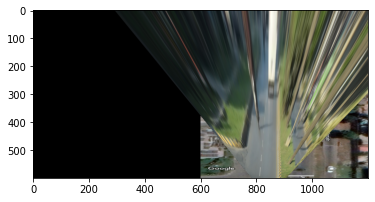

In [194]:
# YOUR CODE
stitchedImage = cv2.warpPerspective(image1, P, (canvas.shape[1], canvas.shape[0]))
stitchedImage[:, image1.shape[1]:, :] = np.where(stitchedImage[:, image1.shape[1]:, :] == 0, image2, stitchedImage[:, image1.shape[1]:, :])

plt.imshow(stitchedImage[:,:,::-1])